# Operations

scmdata has limited support for operations with `ScmRun` instances. Here we provide examples of how to use them.

## Available operations

At present, only add, subtract, multiply and divide are available. However, these operations are unit aware so are fairly powerful.

## Load some data

We first load some test data.

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback
import warnings

import numpy as np
import pandas as pd
from openscm_units import unit_registry

from scmdata import ScmRun, run_append

import matplotlib.pyplot as plt

In [2]:
db_emms = ScmRun("rcp26_emissions.csv", lowercase_cols=True)
db_emms.tail()

time                                                 1765-01-01 00:00:00  \
model scenario region variable        unit                                 
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr                  0.0   
                      Emissions|NOx   Mt N / yr                      0.0   
                      Emissions|OC    Mt OC / yr                     0.0   
                      Emissions|SF6   kt SF6 / yr                    0.0   
                      Emissions|SOx   Mt S / yr                      0.0   

time                                                 1766-01-01 00:00:00  \
model scenario region variable        unit                                 
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr             1.596875   
                      Emissions|NOx   Mt N / yr                 0.109502   
                      Emissions|OC    Mt OC / yr                0.565920   
                      Emissions|SF6   kt SF6 / yr               0.000000   
                      Emissions|SOx   Mt S / yr                 0.098883   

time                                                 1767-01-01 00:00:00  \
model scenario region variable        unit                                 
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr             2.292316   
                      Emissions|NOx   Mt N / yr                 0.168038   
                      Emissions|OC    Mt OC / yr                0.781468   
                      Emissions|SF6   kt SF6 / yr               0.000000   
                      Emissions|SOx   Mt S / yr                 0.116307   

time                                                 1768-01-01 00:00:00  \
model scenario region variable        unit                                 
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr             2.988648   
                      Emissions|NOx   Mt N / yr                 0.226625   
                      Emissions|OC    Mt OC / yr                0.997361   
                      Emissions|SF6   kt SF6 / yr               0.000000   
                      Emissions|SOx   Mt S / yr                 0.133811   

time                                                 1769-01-01 00:00:00  \
model scenario region variable        unit                                 
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr             3.685897   
                      Emissions|NOx   Mt N / yr                 0.285264   
                      Emissions|OC    Mt OC / yr                1.213611   
                      Emissions|SF6   kt SF6 / yr               0.000000   
                      Emissions|SOx   Mt S / yr                 0.151398   

time                                                 1770-01-01 00:00:00  \
model scenario region variable        unit                                 
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr             4.384091   
                      Emissions|NOx   Mt N / yr                 0.343956   
                      Emissions|OC    Mt OC / yr                1.430229   
                      Emissions|SF6   kt SF6 / yr               0.000000   
                      Emissions|SOx   Mt S / yr                 0.169070   

time                                                 1771-01-01 00:00:00  \
model scenario region variable        unit                                 
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr             5.083260   
                      Emissions|NOx   Mt N / yr                 0.402704   
                      Emissions|OC    Mt OC / yr                1.647226   
                      Emissions|SF6   kt SF6 / yr               0.000000   
                      Emissions|SOx   Mt S / yr                 0.186831   

time                                                 1772-01-01 00:00:00  \
model scenario region variable        unit                                 
IMAGE RCP26    World  Emissions|NMVOC Mt NMVOC / yr             5.783435   
                      Emissions|NOx   Mt 

In [3]:
db_forcing = ScmRun(
    "rcmip-radiative-forcing-annual-means-v4-0-0.csv", lowercase_cols=True
).drop_meta(["mip_era", "activity_id"], inplace=False)

db_forcing.head()

time                                                                            1750-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   

time                                                                            1751-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   

time                                                                            1752-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   

time                                                                            1753-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   

time                                                                            1754-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2                  NaN   

time                                                                            1755-01-01 00:00:00  \
model scenario region variable                                           unit                         
AIM   rcp60    World  Radiative Forcing                                  W/m^2                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2   

### Add

A very simple example is adding two variables together. For example, below we calculate total CO$_2$ emissions for the RCP2.6 scenario. 

In [4]:
emms_co2 = db_emms.filter(
    variable="Emissions|CO2|MAGICC Fossil and Industrial"
).add(
    db_emms.filter(variable="Emissions|CO2|MAGICC AFOLU"),
    op_cols={"variable": "Emissions|CO2"},
)
emms_co2.head()

,,,,time,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,1772-01-01 00:00:00,1773-01-01 00:00:00,1774-01-01 00:00:00,...,2491-01-01 00:00:00,2492-01-01 00:00:00,2493-01-01 00:00:00,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
model,scenario,region,variable,unit,,,,,,,,,,,,,,,,,,,,,
IMAGE,RCP26,World,Emissions|CO2,C * gigametric_ton / a,0.003,0.008338,0.013677,0.019015,0.024353,0.029691,0.03603,0.041368,0.046706,0.052045,...,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308


<AxesSubplot:xlabel='time', ylabel='value'>

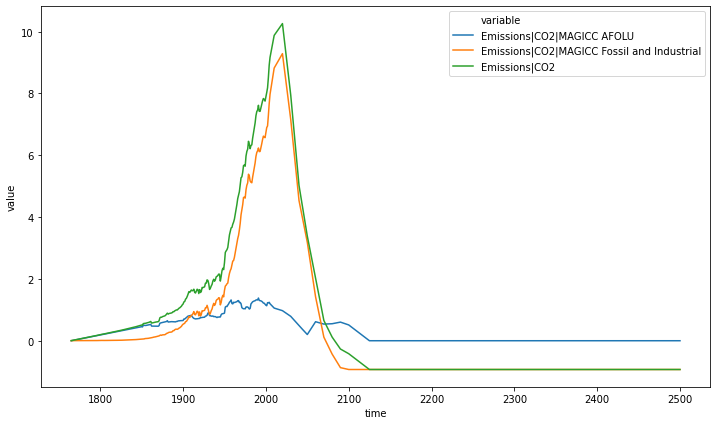

In [5]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
plt_df = run_append([db_emms, emms_co2])
plt_df.filter(variable="*CO2*").lineplot(hue="variable", ax=ax)

The `op_cols` argument tells scmdata which columns to ignore when aligning the data and what value to give this column in the output. So we could do the same calculation but give the output a different name as shown below.

In [6]:
emms_co2_different_name = db_emms.filter(
    variable="Emissions|CO2|MAGICC Fossil and Industrial"
).add(
    db_emms.filter(variable="Emissions|CO2|MAGICC AFOLU"),
    op_cols={"variable": "Emissions|CO2|Total"},
)
emms_co2_different_name.head()

,,,,time,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,1772-01-01 00:00:00,1773-01-01 00:00:00,1774-01-01 00:00:00,...,2491-01-01 00:00:00,2492-01-01 00:00:00,2493-01-01 00:00:00,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
model,scenario,region,variable,unit,,,,,,,,,,,,,,,,,,,,,
IMAGE,RCP26,World,Emissions|CO2|Total,C * gigametric_ton / a,0.003,0.008338,0.013677,0.019015,0.024353,0.029691,0.03603,0.041368,0.046706,0.052045,...,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308,-0.9308


## Subtract

Subtraction works much the same way. Below we calculate the total effective radiative forcing and CO$_2$ effective radiative forcing in the [RCMIP](rcmip.org) data.

In [7]:
non_co2_rf = db_forcing.filter(
    variable="Effective Radiative Forcing"
).subtract(
    db_forcing.filter(
        variable="Effective Radiative Forcing|Anthropogenic|CO2"
    ),
    op_cols={"variable": "Effective Radiative Forcing|Non-CO2"},
)
non_co2_rf.head()

time                                                                                            1750-01-01 00:00:00  \
model   scenario                  region variable                            unit                                     
AIM/CGE ssp370                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.259367   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.259367   
        ssp370-lowNTCF-gidden     World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.259367   
GCAM4   ssp434                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.259367   
        ssp460                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.259367   

time                                                                                            1751-01-01 00:00:00  \
model   scenario                  region variable                            unit                                     
AIM/CGE ssp370                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.241965   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.241965   
        ssp370-lowNTCF-gidden     World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.241965   
GCAM4   ssp434                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.241965   
        ssp460                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.241965   

time                                                                                            1752-01-01 00:00:00  \
model   scenario                  region variable                            unit                                     
AIM/CGE ssp370                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.213009   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.213009   
        ssp370-lowNTCF-gidden     World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.213009   
GCAM4   ssp434                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.213009   
        ssp460                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.213009   

time                                                                                            1753-01-01 00:00:00  \
model   scenario                  region variable                            unit                                     
AIM/CGE ssp370                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.177158   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.177158   
        ssp370-lowNTCF-gidden     World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.177158   
GCAM4   ssp434                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.177158   
        ssp460                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.177158   

time                                                                                            1754-01-01 00:00:00  \
model   scenario                  region variable                            unit                                     
AIM/CGE ssp370                    World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.142201   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.142201   
        ssp370-lowNTCF-gidden     World  Effective Radiative Forcing|Non-CO2 watt / meter ** 2             0.142201   
GCAM4   ssp434                    World  Effective Radiative Forcing|

<AxesSubplot:xlabel='time', ylabel='value'>

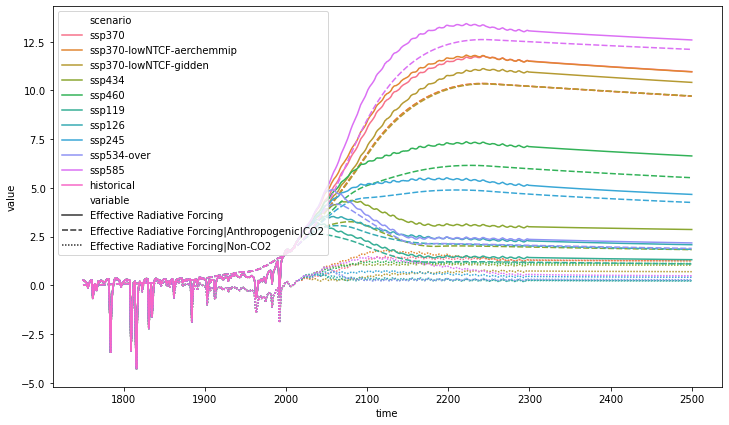

In [8]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
plt_df_forcing = run_append([db_forcing, non_co2_rf])
plt_df_forcing.filter(
    variable=["Effective Radiative Forcing", "Effective*CO2*"]
).lineplot(style="variable")

We could also calculate the difference between some SSP and RCP scenarios. The first thing to try would be to simply subtract the SSP126 total effective radiative forcing from the RCP26 total radiative forcing.

In [9]:
try:
    ssp126_minus_rcp26 = db_forcing.filter(
        scenario="ssp126", variable="Effective Radiative Forcing"
    ).subtract(
        db_forcing.filter(scenario="rcp26", variable="Radiative Forcing"),
        op_cols={"scenario": "ssp126 - rcp26",},
    )
except KeyError:
    traceback.print_exc(limit=0, chain=False)

Traceback (most recent call last):
KeyError: "No equivalent in `other` for [('model', 'IMAGE'), ('region', 'World'), ('variable', 'Effective Radiative Forcing')]"


Doing this gives us a `KeyError`. The reason is that the SSP126 variable is `Effective Radiative Forcing` whilst the RCP26 variable is `Radiative Forcing` hence the two datasets don't align. We can work around this using the `op_cols` argument.

<AxesSubplot:xlabel='time', ylabel='watt / meter ** 2'>

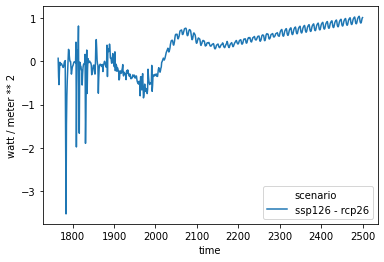

In [10]:
# NBVAL_IGNORE_OUTPUT
ssp126_minus_rcp26 = db_forcing.filter(
    scenario="ssp126", variable="Effective Radiative Forcing"
).subtract(
    db_forcing.filter(scenario="rcp26", variable="Radiative Forcing"),
    op_cols={"scenario": "ssp126 - rcp26", "variable": "RF",},
)
ssp126_minus_rcp26.lineplot()

We could create plots of all the differences as shown below.

In [11]:
ssp_rcp_diffs = []
for target in ["26", "45", "60", "85"]:
    ssp = db_forcing.filter(
        scenario="ssp*{}".format(target),
        variable="Effective Radiative Forcing",
    )
    ssp_scen = ssp.get_unique_meta("scenario", no_duplicates=True)
    ssp_model = ssp.get_unique_meta("model", no_duplicates=True)

    rcp = db_forcing.filter(
        scenario="rcp{}".format(target), variable="Radiative Forcing"
    )
    rcp_scen = rcp.get_unique_meta("scenario", no_duplicates=True)
    rcp_model = rcp.get_unique_meta("model", no_duplicates=True)

    ssp_rcp_diff = ssp.subtract(
        rcp,
        op_cols={
            "scenario": "{} - {}".format(ssp_scen, rcp_scen),
            "model": "{} - {}".format(ssp_model, rcp_model),
            "variable": "RF",
        },
    )
    ssp_rcp_diffs.append(ssp_rcp_diff)

ssp_rcp_diffs = run_append(ssp_rcp_diffs)
ssp_rcp_diffs.head()

,,,,time,1750-01-01 00:00:00,1751-01-01 00:00:00,1752-01-01 00:00:00,1753-01-01 00:00:00,1754-01-01 00:00:00,1755-01-01 00:00:00,1756-01-01 00:00:00,1757-01-01 00:00:00,1758-01-01 00:00:00,1759-01-01 00:00:00,...,2491-01-01 00:00:00,2492-01-01 00:00:00,2493-01-01 00:00:00,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
model,scenario,region,variable,unit,,,,,,,,,,,,,,,,,,,,,
IMAGE - IMAGE,ssp126 - rcp26,World,RF,watt / meter ** 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.036063,1.044192,0.998926,0.927014,0.894074,0.886604,0.904720,0.950169,0.995562,1.012583
MESSAGE-GLOBIOM - MiniCAM,ssp245 - rcp45,World,RF,watt / meter ** 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.460000,0.458162,0.456325,0.454487,0.452659,0.450835,0.449006,0.447191,0.445375,0.444465
GCAM4 - AIM,ssp460 - rcp60,World,RF,watt / meter ** 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.656893,0.654786,0.652687,0.650594,0.648503,0.646411,0.644319,0.642235,0.640155,0.639114
REMIND-MAGPIE - MESSAGE,ssp585 - rcp85,World,RF,watt / meter ** 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.266282,0.264204,0.262160,0.260144,0.258118,0.256072,0.254027,0.252006,0.250012,0.248969


<AxesSubplot:xlabel='time', ylabel='watt / meter ** 2'>

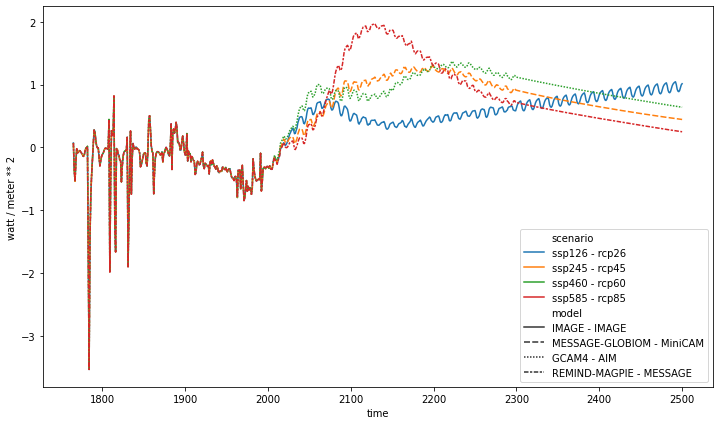

In [12]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
ssp_rcp_diffs.lineplot(ax=ax, style="model")

## Divide

The divide (and multiply) operations clearly have to also be aware of units. Thanks to [Pint's pandas interface](https://pint.readthedocs.io/en/0.13/pint-pandas.html), this can happen automatically. For example, in our calculation below the units are automatically returned as `dimensionless`.

In [13]:
ssp126_to_rcp26 = db_forcing.filter(
    scenario="ssp126", variable="Effective Radiative Forcing"
).divide(
    db_forcing.filter(scenario="rcp26", variable="Radiative Forcing"),
    op_cols={"scenario": "ssp126 / rcp26", "variable": "RF",},
)
ssp126_to_rcp26.head()

/Users/znicholls/Documents/AGCEC/MCastle/scmdata/venv/lib/python3.8/site-packages/pint/quantity.py:1236: RuntimeWarning: divide by zero encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


,,,,time,1750-01-01 00:00:00,1751-01-01 00:00:00,1752-01-01 00:00:00,1753-01-01 00:00:00,1754-01-01 00:00:00,1755-01-01 00:00:00,1756-01-01 00:00:00,1757-01-01 00:00:00,1758-01-01 00:00:00,1759-01-01 00:00:00,...,2491-01-01 00:00:00,2492-01-01 00:00:00,2493-01-01 00:00:00,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
model,scenario,region,variable,unit,,,,,,,,,,,,,,,,,,,,,
IMAGE,ssp126 / rcp26,World,RF,dimensionless,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987642,2.003883,1.920958,1.802047,1.752583,1.742102,1.769413,1.841106,1.918814,1.949772


<AxesSubplot:xlabel='time', ylabel='dimensionless'>

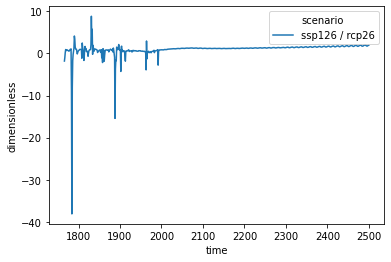

In [14]:
# NBVAL_IGNORE_OUTPUT
ssp126_to_rcp26.lineplot()

## Integrate

We can also integrate our data. As previously, thanks to [Pint](https://pint.readthedocs.io/en/0.13) and some other work, this operation is also unit aware.

In [15]:
with warnings.catch_warnings():
    # Ignore warning about nans in the historical timeseries
    warnings.filterwarnings("ignore", module="scmdata.ops")

    erf_integral = (
        db_forcing.filter(variable="Effective Radiative Forcing")
        .integrate()
        .convert_unit("TJ / m^2")
    )

erf_integral

<scmdata.ScmRun (timeseries: 11, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	              model                   scenario region  \
	0           AIM/CGE                     ssp370  World   
	1           AIM/CGE  ssp370-lowNTCF-aerchemmip  World   
	2           AIM/CGE      ssp370-lowNTCF-gidden  World   
	3             GCAM4                     ssp434  World   
	4             GCAM4                     ssp460  World   
	5             IMAGE                     ssp119  World   
	6             IMAGE                     ssp126  World   
	7   MESSAGE-GLOBIOM                     ssp245  World   
	8     REMIND-MAGPIE                ssp534-over  World   
	9     REMIND-MAGPIE                     ssp585  World   
	10      unspecified                 historical  World   
	
	                                  variable      unit  
	0   Cumulative Effective Radiative Forcing  TJ / m^2  
	1   Cumulative Effective Radiative Forcing  TJ / m^2  
	2   Cumulative E

<AxesSubplot:xlabel='time', ylabel='TJ / m^2'>

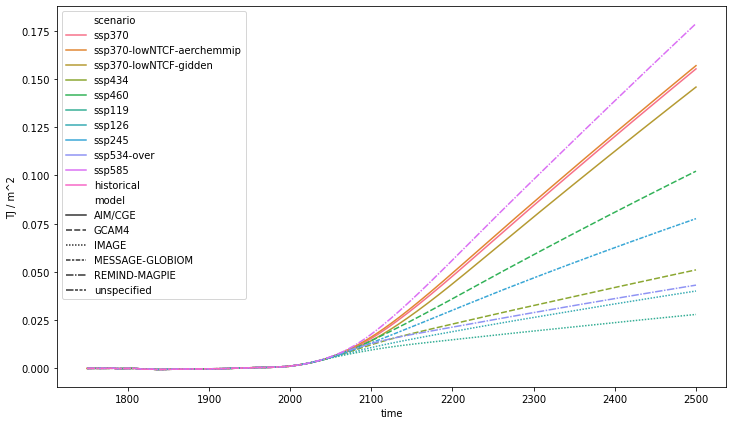

In [16]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
erf_integral.lineplot(ax=ax, style="model")

## Time deltas

We can also calculate the change per unit time of our data. As previously, thanks to [Pint](https://pint.readthedocs.io/en/0.13) and some other work, this operation is also unit aware.

In [17]:
with warnings.catch_warnings():
    # Ignore warning about nans in the historical timeseries
    warnings.filterwarnings("ignore", module="scmdata.ops")

    erf_delta = (
        db_forcing.filter(variable="Effective Radiative Forcing")
        .delta_per_delta_time()
        .convert_unit("W / m^2 / yr")
    )

erf_delta

<scmdata.ScmRun (timeseries: 11, timepoints: 750)>
Time:
	Start: 1750-07-02T12:00:00
	End: 2499-07-02T12:00:00
Meta:
	              model                   scenario region  \
	0           AIM/CGE                     ssp370  World   
	1           AIM/CGE  ssp370-lowNTCF-aerchemmip  World   
	2           AIM/CGE      ssp370-lowNTCF-gidden  World   
	3             GCAM4                     ssp434  World   
	4             GCAM4                     ssp460  World   
	5             IMAGE                     ssp119  World   
	6             IMAGE                     ssp126  World   
	7   MESSAGE-GLOBIOM                     ssp245  World   
	8     REMIND-MAGPIE                ssp534-over  World   
	9     REMIND-MAGPIE                     ssp585  World   
	10      unspecified                 historical  World   
	
	                             variable          unit  
	0   Delta Effective Radiative Forcing  W / m^2 / yr  
	1   Delta Effective Radiative Forcing  W / m^2 / yr  
	2   Delta Effective

(-0.1, 0.2)

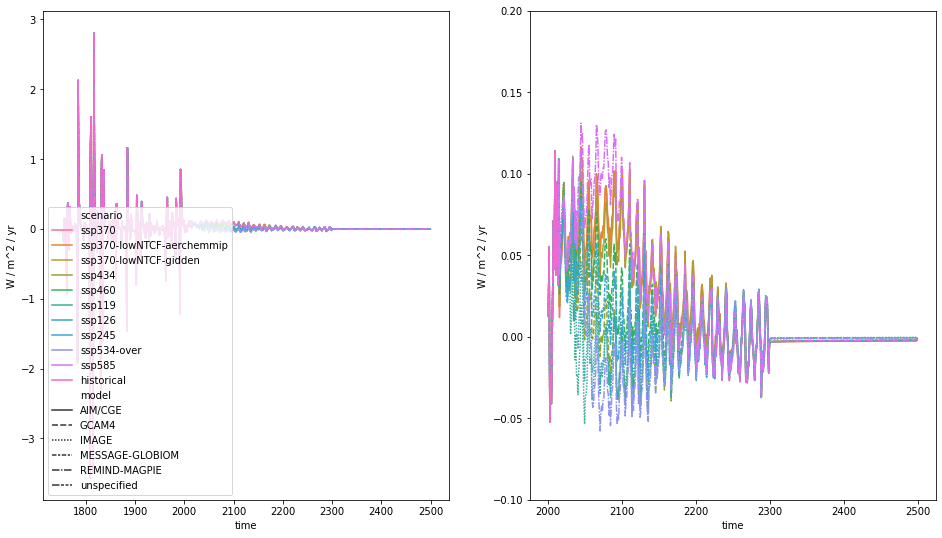

In [18]:
# NBVAL_IGNORE_OUTPUT
fig, axes = plt.subplots(figsize=(16, 9), ncols=2)
erf_delta.lineplot(ax=axes[0], style="model")
erf_delta.filter(year=range(2000, 2500)).lineplot(
    ax=axes[1], style="model", legend=False
)
axes[1].set_ylim([-0.1, 0.2])

## Regression

We can also calculate linear regressions of our data. As previously, thanks to [Pint](https://pint.readthedocs.io/en/0.13) and some other work, this operation is also unit aware.

In [19]:
erf_total = db_forcing.filter(variable="Effective Radiative Forcing").filter(scenario="historical", keep=False)
erf_total_for_reg = erf_total.filter(year=range(2010, 2050))

The default return type of `linear_regression` is a list of dictionaries.

In [20]:
linear_regression_raw = erf_total_for_reg.linear_regression()
type(linear_regression_raw)

list

In [21]:
type(linear_regression_raw[0])

dict

If we want, we can make a `DataFrame` from this list.

In [22]:
linear_regression_df = pd.DataFrame(linear_regression_raw)
linear_regression_df

,model,scenario,region,variable,gradient,intercept
0,AIM/CGE,ssp370,World,Effective Radiative Forcing,1.90373454366716e-09 watt / meter ** 2 / second,-0.4279599209315807 watt / meter ** 2
1,AIM/CGE,ssp370-lowNTCF-aerchemmip,World,Effective Radiative Forcing,2.196587535316519e-09 watt / meter ** 2 / second,-0.8448632244177663 watt / meter ** 2
2,AIM/CGE,ssp370-lowNTCF-gidden,World,Effective Radiative Forcing,1.599468808895454e-09 watt / meter ** 2 / second,0.05747355601293781 watt / meter ** 2
3,GCAM4,ssp434,World,Effective Radiative Forcing,1.5137618251210892e-09 watt / meter ** 2 / second,0.2173818130358951 watt / meter ** 2
4,GCAM4,ssp460,World,Effective Radiative Forcing,1.8242980920680464e-09 watt / meter ** 2 / second,-0.2804321989242344 watt / meter ** 2
5,IMAGE,ssp119,World,Effective Radiative Forcing,8.935038882642927e-10 watt / meter ** 2 / second,1.2017704356912693 watt / meter ** 2
6,IMAGE,ssp126,World,Effective Radiative Forcing,1.2279126589716313e-09 watt / meter ** 2 / second,0.6544862441567447 watt / meter ** 2
7,MESSAGE-GLOBIOM,ssp245,World,Effective Radiative Forcing,1.6273999739537489e-09 watt / meter ** 2 / second,0.03399120647873099 watt / meter ** 2
8,REMIND-MAGPIE,ssp534-over,World,Effective Radiative Forcing,2.2703911252022266e-09 watt / meter ** 2 / second,-0.9204663925813403 watt / meter ** 2
9,REMIND-MAGPIE,ssp585,World,Effective Radiative Forcing,2.2626366011973838e-09 watt / meter ** 2 / second,-0.9168810372684146 watt / meter ** 2


Alternately, we can request only the gradients or only the intercepts (noting that intercepts are calculated using a time base which has zero at 1970-01-01 again).

In [23]:
erf_total_for_reg.linear_regression_gradient("W / m^2 / yr")

,model,scenario,region,variable,gradient,unit
0,AIM/CGE,ssp370,World,Effective Radiative Forcing,0.060077,W / m^2 / yr
1,AIM/CGE,ssp370-lowNTCF-aerchemmip,World,Effective Radiative Forcing,0.069319,W / m^2 / yr
2,AIM/CGE,ssp370-lowNTCF-gidden,World,Effective Radiative Forcing,0.050475,W / m^2 / yr
3,GCAM4,ssp434,World,Effective Radiative Forcing,0.047771,W / m^2 / yr
4,GCAM4,ssp460,World,Effective Radiative Forcing,0.057570,W / m^2 / yr
5,IMAGE,ssp119,World,Effective Radiative Forcing,0.028197,W / m^2 / yr
6,IMAGE,ssp126,World,Effective Radiative Forcing,0.038750,W / m^2 / yr
7,MESSAGE-GLOBIOM,ssp245,World,Effective Radiative Forcing,0.051357,W / m^2 / yr
8,REMIND-MAGPIE,ssp534-over,World,Effective Radiative Forcing,0.071648,W / m^2 / yr
9,REMIND-MAGPIE,ssp585,World,Effective Radiative Forcing,0.071403,W / m^2 / yr


In [24]:
erf_total_for_reg.linear_regression_intercept("W / m^2")

,model,scenario,region,variable,intercept,unit
0,AIM/CGE,ssp370,World,Effective Radiative Forcing,-0.427960,W / m^2
1,AIM/CGE,ssp370-lowNTCF-aerchemmip,World,Effective Radiative Forcing,-0.844863,W / m^2
2,AIM/CGE,ssp370-lowNTCF-gidden,World,Effective Radiative Forcing,0.057474,W / m^2
3,GCAM4,ssp434,World,Effective Radiative Forcing,0.217382,W / m^2
4,GCAM4,ssp460,World,Effective Radiative Forcing,-0.280432,W / m^2
5,IMAGE,ssp119,World,Effective Radiative Forcing,1.201770,W / m^2
6,IMAGE,ssp126,World,Effective Radiative Forcing,0.654486,W / m^2
7,MESSAGE-GLOBIOM,ssp245,World,Effective Radiative Forcing,0.033991,W / m^2
8,REMIND-MAGPIE,ssp534-over,World,Effective Radiative Forcing,-0.920466,W / m^2
9,REMIND-MAGPIE,ssp585,World,Effective Radiative Forcing,-0.916881,W / m^2


If we want to plot the regressions, we can request an `ScmRun` instance based on the linear regressions is returned using the `linear_regression_scmrun` method.

In [25]:
linear_regression = erf_total_for_reg.linear_regression_scmrun()
linear_regression["label"] = "linear regression"
linear_regression

<scmdata.ScmRun (timeseries: 10, timepoints: 40)>
Time:
	Start: 2010-01-01T00:00:00
	End: 2049-01-01T00:00:00
Meta:
	             model                   scenario region  \
	0          AIM/CGE                     ssp370  World   
	1          AIM/CGE  ssp370-lowNTCF-aerchemmip  World   
	2          AIM/CGE      ssp370-lowNTCF-gidden  World   
	3            GCAM4                     ssp434  World   
	4            GCAM4                     ssp460  World   
	5            IMAGE                     ssp119  World   
	6            IMAGE                     ssp126  World   
	7  MESSAGE-GLOBIOM                     ssp245  World   
	8    REMIND-MAGPIE                ssp534-over  World   
	9    REMIND-MAGPIE                     ssp585  World   
	
	                      variable   unit              label  
	0  Effective Radiative Forcing  W/m^2  linear regression  
	1  Effective Radiative Forcing  W/m^2  linear regression  
	2  Effective Radiative Forcing  W/m^2  linear regression  
	3  Effective R

In [26]:
erf_total_for_reg["label"] = "Raw"
pdf = run_append([erf_total_for_reg, linear_regression])

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

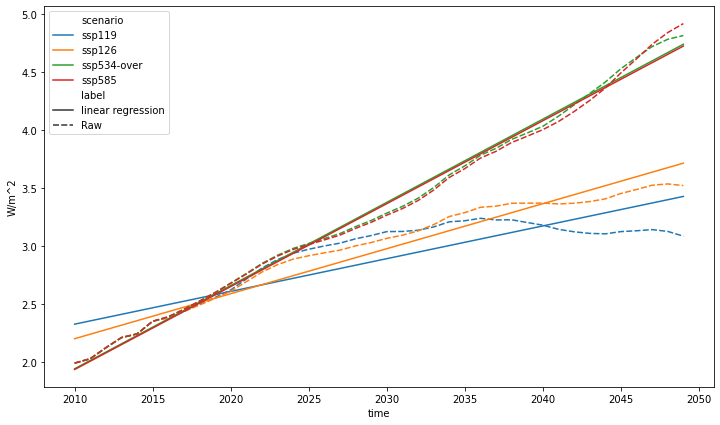

In [27]:
# NBVAL_IGNORE_OUTPUT
fig, axes = plt.subplots(figsize=(12, 7))
pdf.filter(scenario=["ssp1*", "ssp5*"]).lineplot(ax=axes, style="label")

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

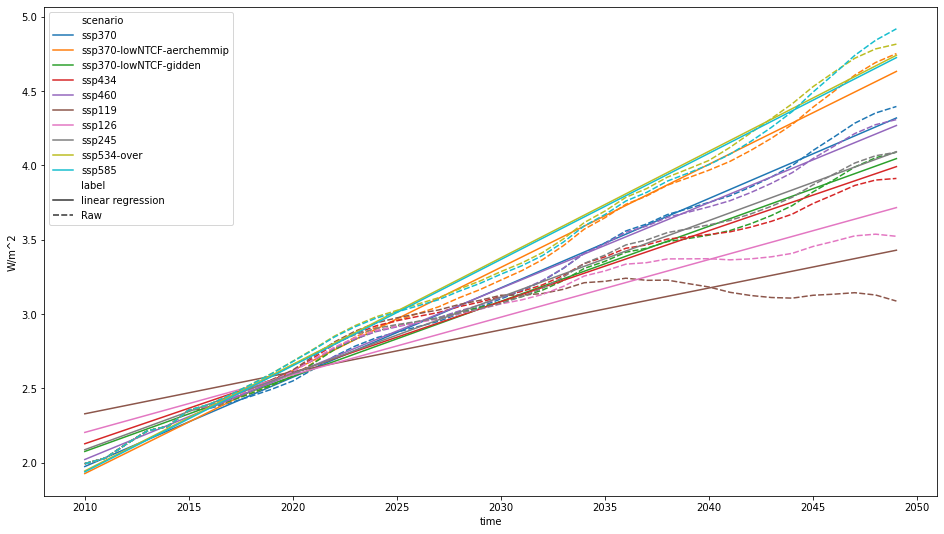

In [28]:
# NBVAL_IGNORE_OUTPUT
fig, axes = plt.subplots(figsize=(16, 9))
pdf.lineplot(ax=axes, style="label")